# Statistics is the study of the collection, analysis and interpretation of data.
---

With **descriptive statistics** we can summarize data and 

we use **inferential stats** to draw conclusions and make predictions about data.


## Key Termns


**Null hypothesis**

Hypothesis that proposes that no statistically significant difference exists between two specified populations

**Alternative hypothesis**

Hypothesis that proposes that a statistically significant difference does exist between specified populations

**p-value**

The probability of observing a sample statistic at least as extreme as the one that you have, assuming that the null hypothesis is true

**Confidence interval**

A statistical range with a specified probability that a given parameter lies within the range

**t-statistic**

Ratio of the departure from parameter value to hypothesized value due to standard error

**Independent-samples t-test**

A test that compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different

**Variance**

A measure of dispersion equal to the average squared deviation (from the mean) of a set of numbers

**Kurtosis**

Measure of the sharpness of a distribution's peak

**Skewness**

Measure of the degree of asymmetry of a distribution


# Framing questions

On average, does the population of `A's` with `condition X` have higher/lower/equal `feature` levels than the population of `A's` without `condition X`, given the sample that have been collected?

**Examples:**

1. *On average, does the population of patients with diabetes have higher glucose levels than the population of patients without diabetes, given the samples that have been collected?*

2. *On average, does the population of products from Plant A have a higher quality rating than the population of products from Plant B, given the samples that have been collected?*

3. *On average, does the population of customers in Region A spend more than the population of customers in Region B, given the samples that have been collected?*

3. *On average, does the population of homes with air conditioning have a higher sale price than the population of homes without air conditioning, given the samples that have been collected*

## Hypothesis testing

After our precise research question, we go ahead and proceed with the analysis.

First we build a **Null Hypothesis**: No statistically significant difference exists between two specified populations.

and everything else that is not the null hypotesis, 
the **Alternative Hypotheis**: There is a significant difference between specified populations.

***0:    μ1−μ2  = 0*** Means of both populations are equal.

***1:    μ1−μ2 != 0*** Means of both populations are different.



# Independent Samples T-Test
Test that compares the means of two independent groups in order to determine wether there is statistical evidence that the associated population means are significantly different.

### Assumptions of the t-test:
1. The test variable, which is the variable that you are comparing averages for, is continuous.

2. There is no relationship between items. In other words, the measurement of one observation does not affect the measurement of another.

3. The sample is drawn at random from the population. 

4. The test variable's samples and population are approximately normally distributed. 

5. The sample is reasonably large enough to be representative of the population. Traditionally, a sample size of 30 was regarded as the bare minimum to establish a reflective sample; however, 60 could be used as a safer threshold.

6. Variances (the average squared deviation from the mean) are approximately equal in both the sample and population. Again, although you don't know the variance of the population, the variances should be pretty similar if the sample is indeed reflective of the population. There are ways to formally test this assumption. (not doing it here)

# Establishing Normality
Here the whole subject of EDA comes as this involves, visual and discriptive statistics. 

[Skewness and Kurtosis](https://www.freecodecamp.org/news/skewness-and-kurtosis-in-statistics-explained/)


**Kurtosis**

Measure of the sharpness of a distribution's peak

**Skewness**

Measure of the degree of asymmetry of a distribution

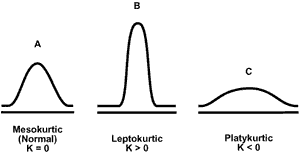

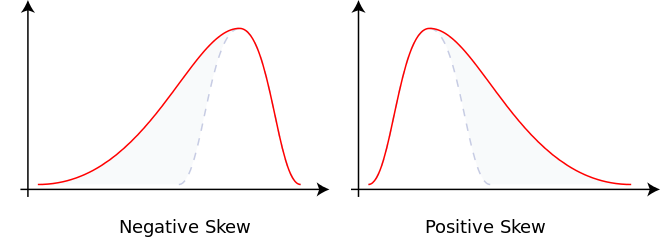

In [8]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kurtosis: -0.3436262086911235
Skewness: 0.09307688868946096
DescribeResult(nobs=1000, minmax=(-751.132617176189, 903.2739241494461), mean=43.670369405133464, variance=88463.65254328502, skewness=0.09307688868946096, kurtosis=-0.3436262086911235)


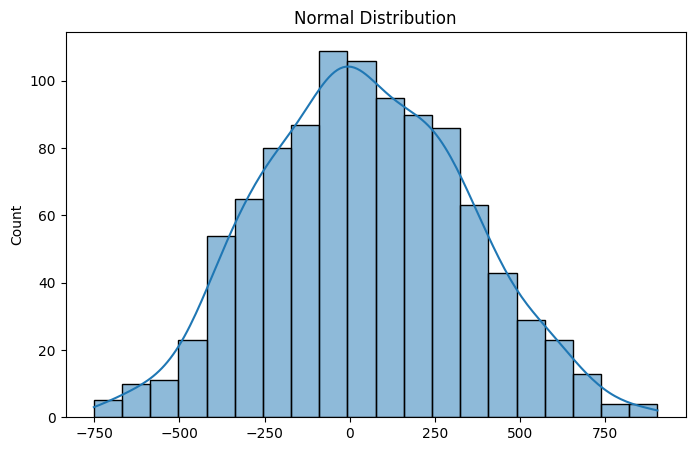

In [11]:
## Normal dist
rand1 = np.random.normal(50, 300, 1000)
plt.figure(figsize = (8, 5))
ax = plt.subplot()
sns.histplot(data=rand1,kde=True, hue=None)
ax.set_title('Normal Distribution')

print(f'Kurtosis: {kurtosis(rand1)}')
print(f'Skewness: {skew(rand1)}')
print(stats.describe(rand1))

In [5]:
#@title Data Set
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
#@title Skewness
sk = skew(data['median_house_value'])

In [ ]:
#@title Kurtosis
ku = kurtosis(data[['median_house_value']])

Kurtosis: 0.9890670635093471
Skewness: [0.39274097]


Text(0.5, 1.0, 'median_house_value Histogram')

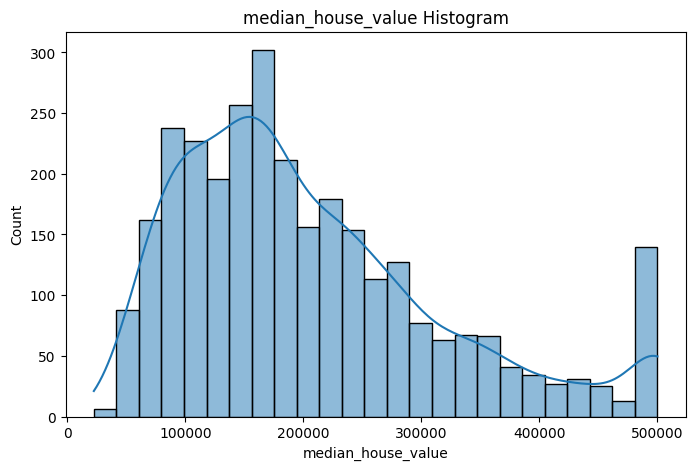

In [ ]:
#@title Histogram
print(f'Kurtosis: {sk}')
print(f'Skewness: {ku}')

num_features = data.columns

plt.figure(figsize = (8, 5))
ax = plt.subplot()
sns.histplot(data=data['median_house_value'],kde=True, hue=None)
ax.set_title('median_house_value Histogram')

# Calculating the t-statistic
___

In statistical hypothesis testing, you compare a test statistic to a critical value to decide whether to reject the null. The test statistic used for a t-test is conveniently called the t-statistic. It's calculated like so:

        t =  x̅₁ - x̅₂ / sqrt((s₁**2 / n₁) + (s₂**2 / n₂))

Where:

x̅₁ = Mean of first sample

x̅₂ = Mean of second sample

n₁ = Sample size of first sample

n₂ = Sample size of second sample

s₁ = Standard deviation of first sample

s₂ = Standard deviation of second sample

The numerator consists of the means of each sample. 

Taking the difference between the means. 

Denominator is a pooled combination of the variances of each sample. 

So, you are taking the difference in means and then dividing that by a "hybrid" standard error to come up with your test statistic. You'll compare this statistic to the critical value to decide whether to reject the null.

Your "number to beat" is ± 1.96—that's the critical value for a two-tail hypothesis test at the 95% confidence interval.

Two-tail means that you are looking for a number that is significantly greater or less than the parameter. And that's why you are looking in both directions, for test statistics that are either greater than positive 1.96 or less than -1.96.


In [ ]:
## from scipy import stats
# stats.ttest_ind('df_yes[column]', 'df_no[column]')

# Confidence Interval

A statistical range with a specified probability that a given parameter lies within the range
___

Bridging the gap with confidence intervals
Going back to the null hypothesis, is wanted to establish whether the population means are likely to be the same. 

Of course, We don't know the population means for sure, so the hypothesis must be falsified on the basis of a probability instead. For this, look at the relationship between the confidence interval and α.

A confidence interval is so called because you assign a specified level of confidence that a given range is likely to contain the population mean. It is most common to infer a population mean at the 95% confidence interval. 

For example, **a range of 1.3-4.2 at the 95% confidence interval means that you expect, with 95% confidence, that the difference in population means lies between 1.3 and 4.2.**

1 minus this confidence level is known as α (the Greek letter alpha). This value indicates the likelihood that the true population parameter lies outside of the confidence interval. So, the α for the 95% confidence level is 5%, or 0.05.

The formula to calculate a 95% confidence interval for a difference in means is as follows:

$$(\overline{X}_{1}-\overline{X}_{2}) \pm 1.96 * {\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}$$

Where:

x̅₁ = Mean of first sample

x̅₂ = Mean of second sample

n₁ = Sample size of first sample

n₂ = Sample size of second sample

s₁ = Standard deviation of first sample

s₂ = Standard deviation of second sample

You may recognize that number 1.96: that was the critical value to compare your test score against. Each of these statistics is providing a different perspective to the same analysis.

Whew! That was a lot of complex information. And when in doubt, draw a picture! Visualizing these confidence intervals may be helpful. The images below come from an interactive dashboard that is worth exploring (check out the Find Probability tab).

The bell curve of these visualizations should look familiar; this is the normal distribution, which you assume that your samples roughly follow. You may notice in these pictures that this distribution is centered around 0, with a standard deviation of 1. This practice is called standardization. Standardization is done in part for ease of interpretation; you can now easily interpret where values fall on a curve, based entirely on their relative standard deviation from the mean.

Take a look at the 95% confidence interval. The dark blue range represents the set of values where there is a 95% probability that the value of the population mean lies within it.

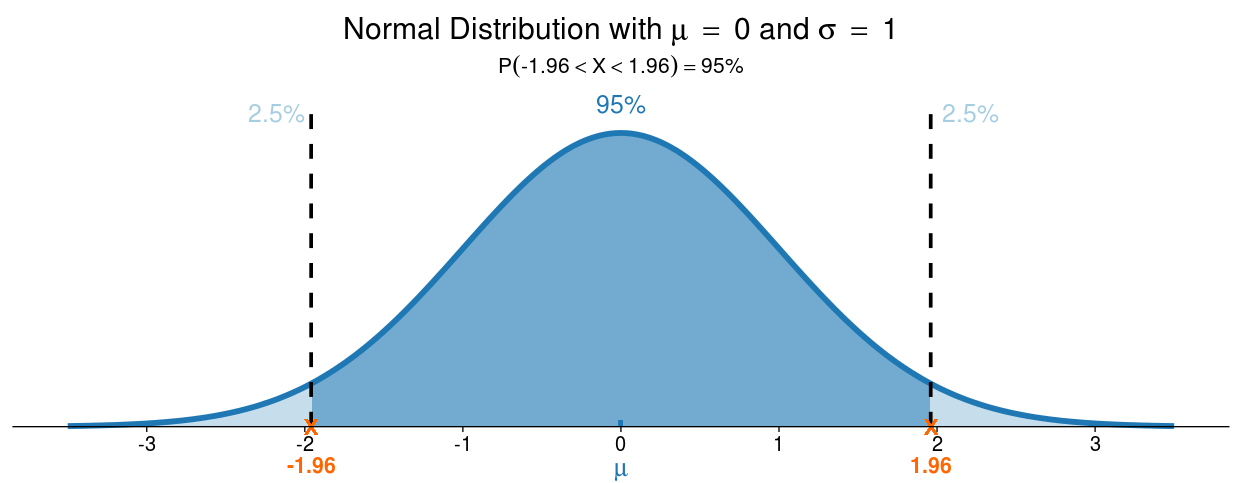

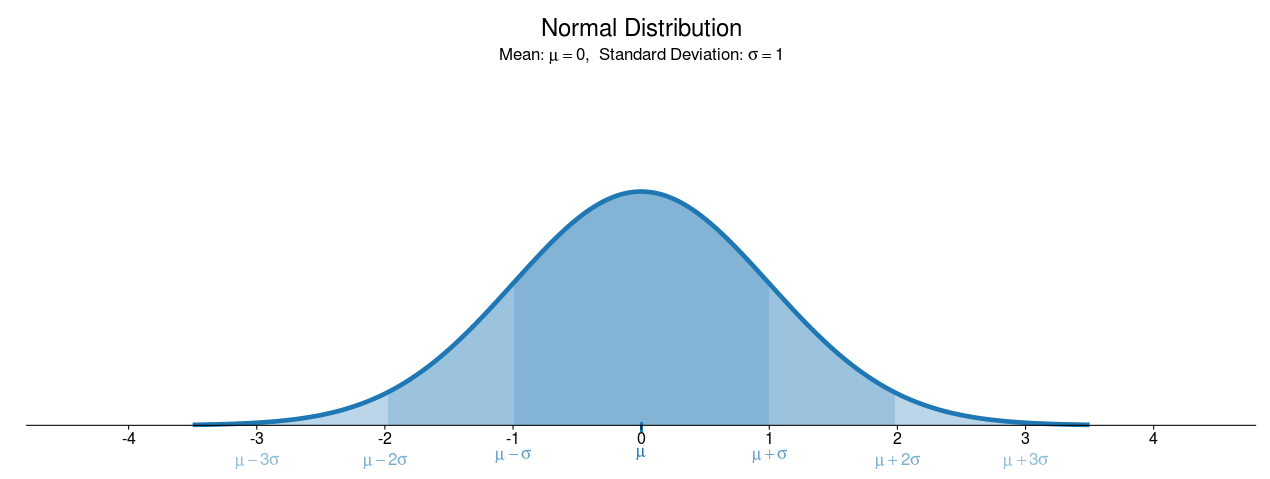

In [13]:
import math

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# p-value
---

### All you have to do is check if a number is under 0.05—could it get any easier?

---

The hypotheses:

H0 : u1 - u2  = 0  # there is no difference

H1 : u1 - u2 != 0  # there is difference

The null hypothesis is the status quo; in other words, the values are the same.

There is a possibility that you will find a significant difference between the two sample means even when the null is true, due to random chance. 
You can state this possibility as a probability from 0 to 1. 

This is the p-value, the probability of observing a sample statistic at least as extreme as the one that you have, assuming the null hypotesisis true. 
Is another commonly reported measure of statistical significance.

**P-value** is evaluated against your chosen α to determine whether there is a significant probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis. This occurrence would be due to random error, not any meaningful relationship.

**If p < α, the test is significant.** 
There is a low probability that you would find an effect at least as extreme as this sample's, assuming that the null is true.

**If p > α, the test isn't significant.** 
There is a high probability that you would find an effect at least as extreme as this sample's, assuming that the null is true.





p-value = 0.030

Outcome of test (α = 0.05, two-tail) = Significant

Interpretation = Assuming that the null is true, you would obtain the observed difference or more in 3% of samples due to random error.

-

p-value = 0.075

Outcome of test (α = 0.05, two-tail) = Not significant

Interpretation = Assuming that the null is true, you would obtain the observed difference or more in 7.5% of samples due to random error.

-

p-value = 0.501

Outcome of test (α = 0.05, two-tail) = Not significant

Interpretation = Assuming that the null is true, you would obtain the observed difference or more in 50.1% of samples due to random error.

-

p-value = 0.005

Outcome of test (α = 0.05, two-tail) = Significant

Interpretation = Assuming that the null is true, you would obtain the observed difference or more in 0.5% of samples due to random error.

-